

# Introduction



**Slava Ukraini** (English transliteration of Ukrainean **Слава Україні!**) means **Glory to Ukraine**. It is a Ukrainian national salute, known as a symbol of Ukrainian sovereignty and resistance and as the official salute of the Armed Forces of Ukraine since 2018 (from Wikipedia).

The tweets in the dataset are with the hashtag #SlavaUkraini. 

The Dataset is collected using Twitter API, **tweepy** and Python package.

<img src="https://editiadedimineata.ro/wp-content/uploads/2022/03/Slava-Ukraini.jpg" width=500></img>

# Data preparation

## Load packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
tweets_df = pd.read_csv("../input/slava-ukraini-tweets/slava_ukraini.csv")

# Data exploration


## Glimpse the data

In [3]:
print(f"data shape: {tweets_df.shape}")

data shape: (6842, 16)


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6842 entries, 0 to 6841
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6842 non-null   int64 
 1   user_name         6842 non-null   object
 2   user_location     4570 non-null   object
 3   user_description  6011 non-null   object
 4   user_created      6842 non-null   object
 5   user_followers    6842 non-null   int64 
 6   user_friends      6842 non-null   int64 
 7   user_favourites   6842 non-null   int64 
 8   user_verified     6842 non-null   bool  
 9   date              6842 non-null   object
 10  text              6842 non-null   object
 11  hashtags          4475 non-null   object
 12  source            6842 non-null   object
 13  retweets          6842 non-null   int64 
 14  favorites         6842 non-null   int64 
 15  is_retweet        6842 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 761.8+ KB


In [5]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,6.842000e+03,6.842000e+03,6842.000000,6842.000000,6842.000000,6842.000000
mean,1.498699e+18,5.925055e+03,1630.469892,35923.471792,2.246127,10.793774
std,1.298600e+14,1.402250e+05,4139.960973,77809.106987,33.562687,162.701725
min,1.498441e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.498620e+18,5.500000e+01,130.000000,649.000000,0.000000,0.000000
50%,1.498699e+18,2.540000e+02,526.000000,5901.500000,0.000000,1.000000
75%,1.498792e+18,1.211000e+03,1656.500000,32953.750000,0.000000,2.000000
max,1.498945e+18,5.633343e+06,177291.000000,806389.000000,1922.000000,9451.000000


In [6]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1498446801376002051,Rob Smith 🇨🇦 🇺🇦,"Ontario, Canada","Proud Canadian 🇨🇦, ❤️ baseball ⚾️, ❤️ history,...",2013-02-18 18:05:01,395,1898,4137,False,2022-02-28 23:55:31,@kiraincongress Photos of rally in support of ...,NaN,Twitter for iPhone,0,0,False
1,1498446755947499524,Frags,Chicago,ay yo video games\nMarried To My Best Friend @...,2013-05-18 16:53:43,10523,269,3051,False,2022-02-28 23:55:21,#Russia propaganda on #Twitter attempting to d...,"['Russia', 'Twitter', 'Ukraine']",Twitter for iPhone,0,1,False
2,1498446700096245760,Mark Malahosky 🇺🇦,"Webster, NY",Pharmacist practicing at a Federally Qualified...,2015-07-14 12:38:43,184,164,38434,False,2022-02-28 23:55:07,@1Arnold_Friend @MaryEmBern @13WHAM Putin lack...,['SlavaUkraini'],Twitter for iPhone,0,1,False
3,1498446601710448647,oz,"Hlavní město Praha, Česká repu",foodandfilms,2013-07-21 11:38:47,17,93,7907,False,2022-02-28 23:54:44,"@profgalloway Dear prof, I have been following...",NaN,Twitter for Android,0,1,False
4,1498446536820224000,Sydfish 🇺🇦🇺🇦🇺🇦🇺🇦,"California, USA",Soccer mom with a punk rock heart!!!!🛑NO LISTS...,2008-12-20 22:41:51,9136,8070,167748,False,2022-02-28 23:54:28,I’ve done more than 100 in St. Petersburg. \n\...,NaN,Twitter for iPhone,0,0,False


### Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,2272,831,0,0,0,0,0,0,0,2367,0,0,0,0
Percent,0.0,0.0,33.206665,12.145571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.595148,0.0,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


### Unique values

In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,6842,6842,4570,6011,6842,6842,6842,6842,6842,6842,6842,4475,6842,6842,6842,6842
Uniques,6842,3643,1635,3164,3655,1715,1901,3472,2,6599,6840,1843,19,72,140,1


### Most frequent values

In [11]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [12]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,6842,6842,4570,6011,6842,6842,6842,6842,6842,6842,6842,4475,6842,6842,6842,6842
Most frequent item,1498446801376002051,BlackCobra,United States,"Journalist, blogger. https://t.co/HNypzpYoCm",2019-08-10 08:58:07,0,28,154,False,2022-03-01 16:09:56,The European Parliament has voted 637 in favou...,['SlavaUkraini'],Twitter Web App,0,0,False
Frequence,1,113,84,113,113,222,106,91,6757,3,2,1536,2293,5315,3217,6842
Percent from total,0.015,1.652,1.838,1.88,1.652,3.245,1.549,1.33,98.758,0.044,0.029,34.324,33.514,77.682,47.018,100.0


## Visualize the data distribution

In [13]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

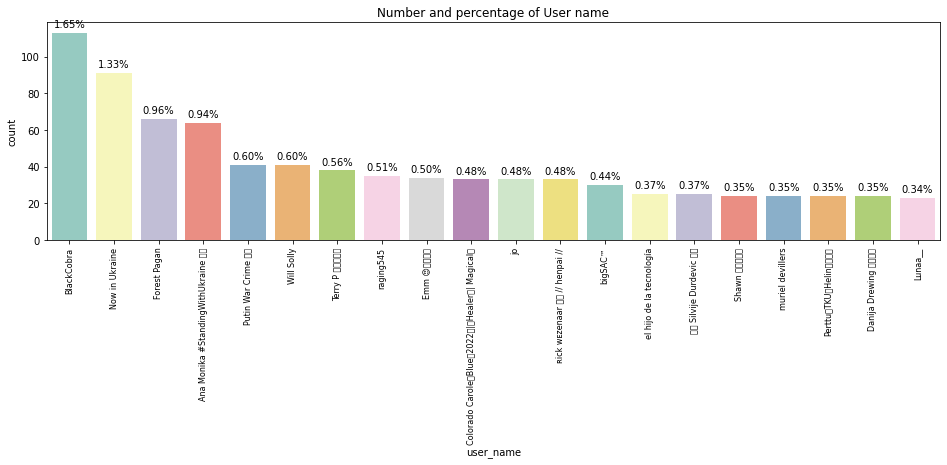

In [14]:
plot_count("user_name", "User name", tweets_df,4)

### User location

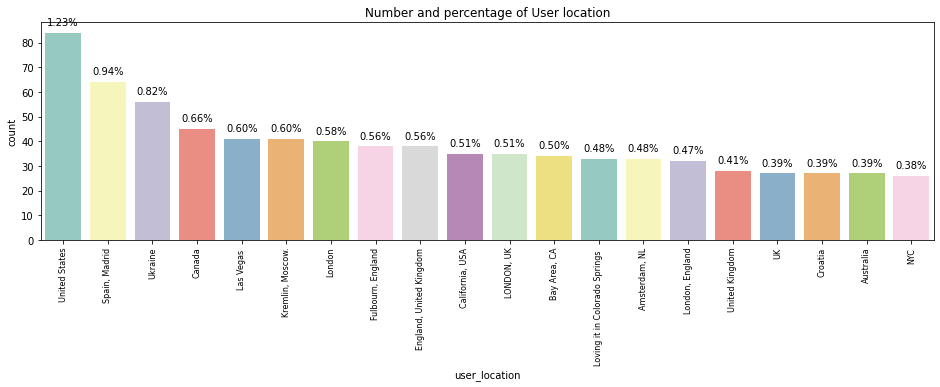

In [15]:
plot_count("user_location", "User location", tweets_df,4)

### Tweet source

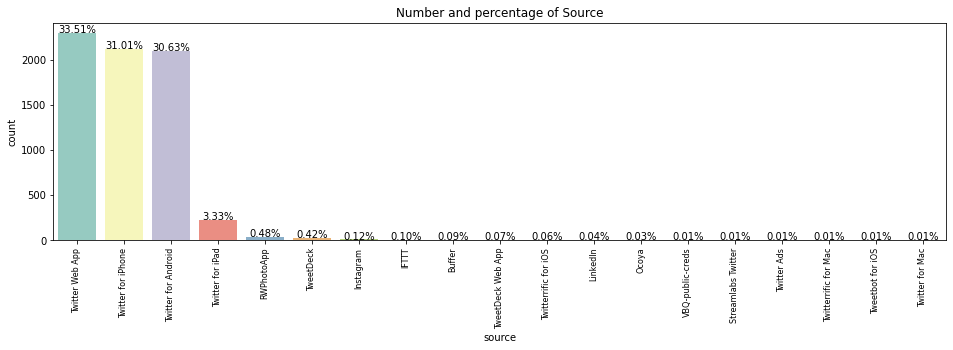

In [16]:
plot_count("source", "Source", tweets_df,4)

In [17]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### Text wordcloauds

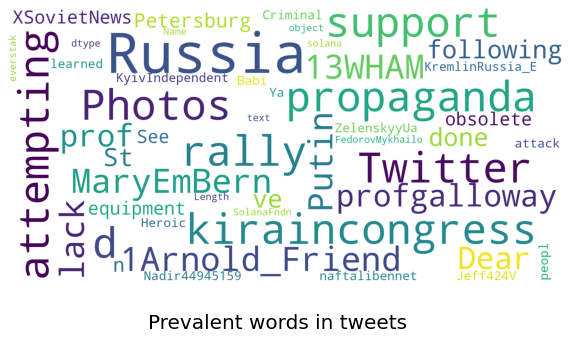

In [18]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

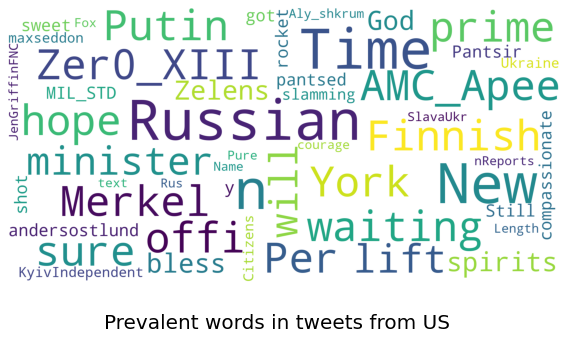

In [19]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

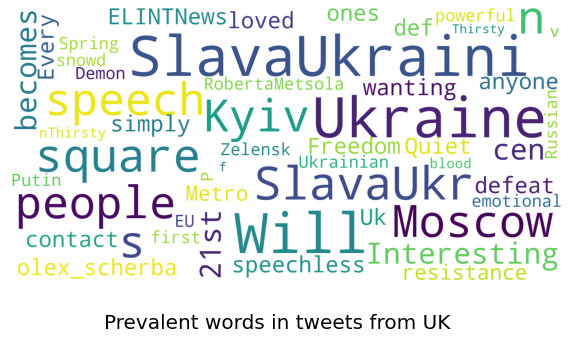

In [20]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

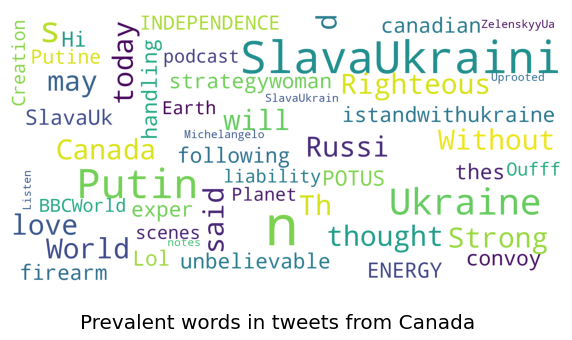

In [21]:
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')

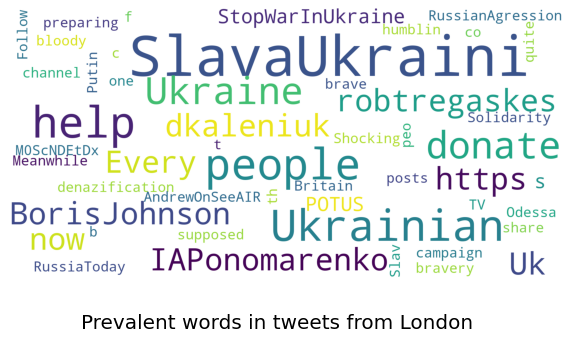

In [22]:
us_df = tweets_df.loc[tweets_df.user_location=="London"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from London')

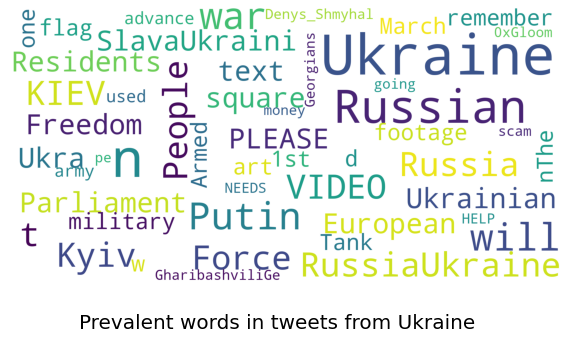

In [23]:
ue_df = tweets_df.loc[tweets_df.user_location=="Ukraine"]
show_wordcloud(ue_df['text'], title = 'Prevalent words in tweets from Ukraine')

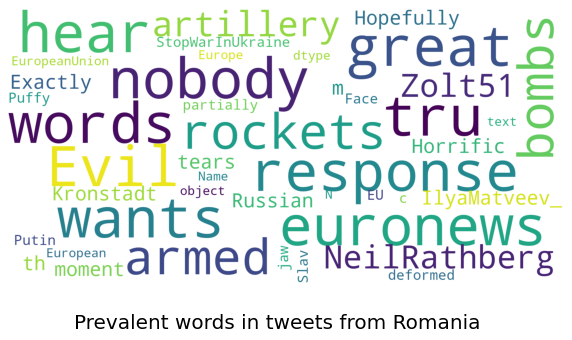

In [24]:
ro_df = tweets_df.loc[tweets_df.user_location=="Romania"]
show_wordcloud(ro_df['text'], title = 'Prevalent words in tweets from Romania')

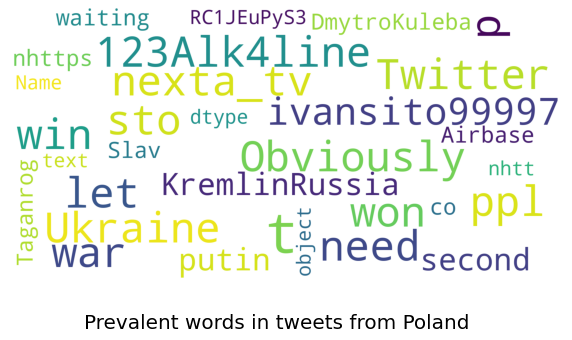

In [25]:
pl_df = tweets_df.loc[tweets_df.user_location=="Poland"]
show_wordcloud(pl_df['text'], title = 'Prevalent words in tweets from Poland')

### Hashtags analysis

In [26]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


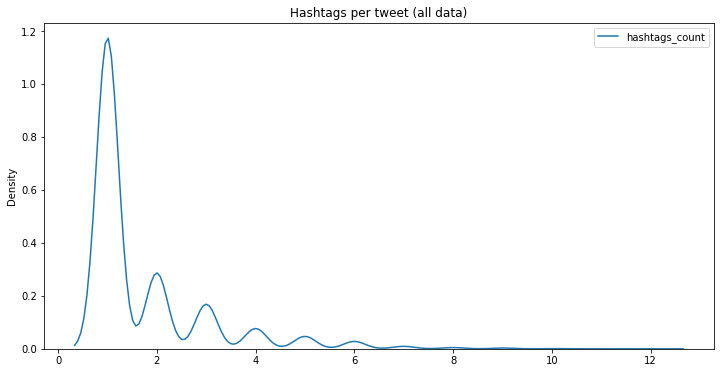

In [27]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [28]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 1980


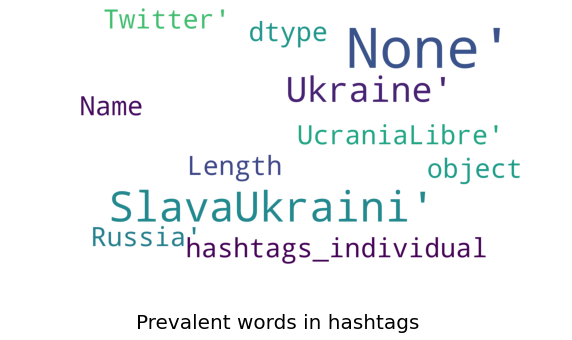

In [29]:
show_wordcloud(tweets_df['hashtags_individual'], title = 'Prevalent words in hashtags')